# scikit-learn中的逻辑回归.ipynb

## 逻辑回归中使用正则化
![逻辑回归中使用正则化](images/逻辑回归中使用正则化.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2)) # 生成均值为0，方差为1的200行2列的数据
y = np.array(X[:, 0]**2 + X[:, 1] < 1.5, dtype='int')  # 表达式的值小于1.5时为True(可以看做0)，大于等于1.5时看做1
for _ in range(20):
    y[np.random.randint(200)] = 1

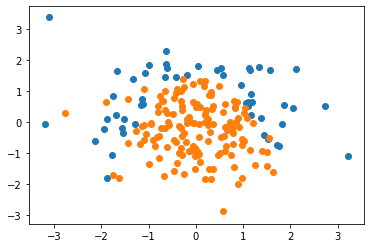

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 使用sklearn中的库来解决上面的逻辑回归问题

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
log_reg.score(X_train, y_train) # LogisticRegression默认地是用得线性模拟地，所以效果不好，下面会用多项式来解决

0.7933333333333333

In [7]:
log_reg.score(X_test, y_test) # 测试数据集也不一般

0.86

In [8]:
def plot_decision_boundary(model, axis):
    """
    根据模型绘制决策边界
    """
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


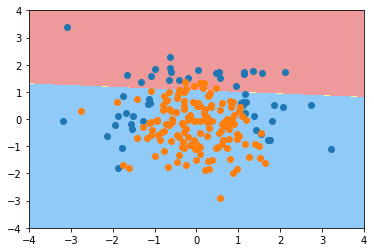

In [9]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 可以看到效果一般

## 引入多项式项

In [10]:
# 为逻辑回归添加多项式项的管道
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)), # 把高次幂转换为线性方程
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression()) # 这里直接用地sklearn自带的逻辑回归方程了
    ])

In [11]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [12]:
poly_log_reg.score(X_train, y_train) # 正确率明显提高

0.9133333333333333

In [13]:
poly_log_reg.score(X_test, y_test) # 正确率也明显提高

0.94

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


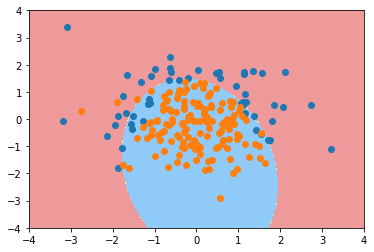

In [14]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 引入多项式后，可以看到决策边界明显准确多了

### 提高degree看看决策边界的变化

In [15]:
poly_log_reg = PolynomialLogisticRegression(degree=20) # 多项式阶数传入地越高，决策边界越不规则
poly_log_reg.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [16]:
poly_log_reg.score(X_train, y_train)

0.94

In [17]:
poly_log_reg.score(X_test, y_test) # 测试集表现查了，可以提高degree并不一定是好地

0.92

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


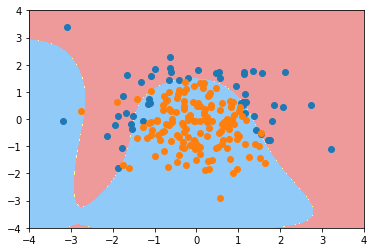

In [18]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 可以看到当degree后，决策边界变地有些乱了，这其实是过拟合的一种表现

### 通过L1正则项C来调整模型
> C是起到模型正则化的作用

In [19]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)), # 把高次幂转换为线性方程
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C)) # 这里直接用地sklearn自带的逻辑回归方程了
    ])

In [20]:
poly_log_reg = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [21]:
poly_log_reg.score(X_train, y_train)

0.8533333333333334

In [22]:
poly_log_reg.score(X_test, y_test)

0.92

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


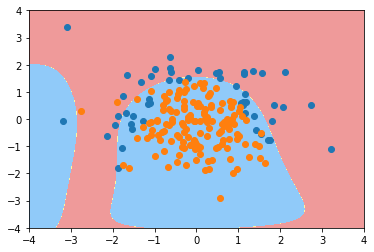

In [23]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 可以看到当degree后，决策边界变地有些乱了，这其实是过拟合的一种表现

### 通过L2正则项`penalty`来调整模型

In [24]:
def PolynomialLogisticRegression(degree, C, penalty='12'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)), # 把高次幂转换为线性方程
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty)) # 这里直接用地sklearn自带的逻辑回归方程了
    ])

In [27]:
poly_log_reg = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')

In [28]:
poly_log_reg.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [29]:
poly_log_reg.score(X_train, y_train)

0.8266666666666667

In [30]:
poly_log_reg.score(X_test, y_test)

0.9

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


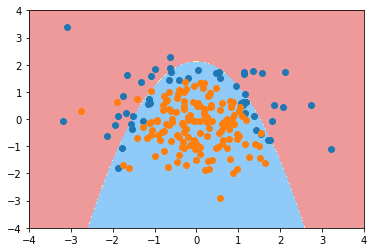

In [31]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 可以看到当degree后，决策边界变地有些乱了，这其实是过拟合的一种表现

### degres、C和penalty都是超参数，找到最合适的系数需要进行网格搜索